# 線形回帰モデル

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

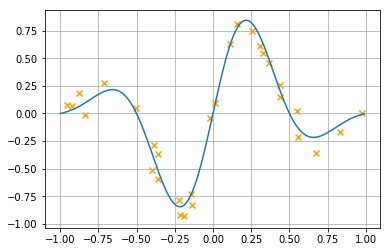

In [7]:
N = 30
M = 10

# 推定する目的関数
def f(x, beta=0):
    y = np.sin(x*2*np.pi) * np.exp(-(x**2) / (2*0.4**2))
    n = np.random.normal(0, beta, size=y.shape)
    return y + n

_x = np.arange(-1, 1, 0.01)
_y = f(_x)

# データ
x = np.random.uniform(-1, 1, size=N)
t = f(x, 0.1)

plt.scatter(x, t, marker='x', color='orange')
plt.plot(_x, _y)
plt.grid()
plt.show()

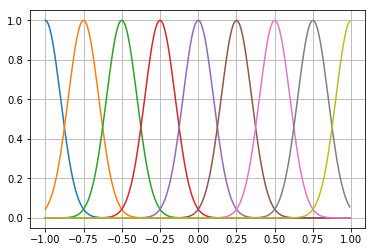

In [4]:
# 基底関数
def gaussian_basic_func(x, s=0.1):
    mu = np.array(1)
    mu = np.append(mu, np.linspace(-1, 1, M-1))
    mm, xx = np.meshgrid(mu, x)
    phi = np.exp(-(xx - mm)**2/(2*s**2))
    phi[:,0] = 1.
    return phi

_x = np.arange(-1, 1, 0.01)
_y = gaussian_basic_func(_x, s=0.1)
plt.plot(_x, _y[:,1:])
plt.grid()
plt.show()

## 最尤推定

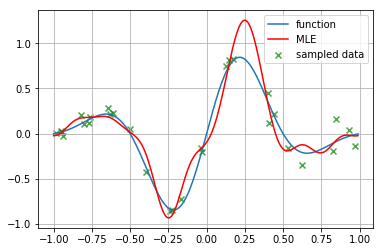

In [5]:
# 計画行列
Phi = gaussian_basic_func(x)
# 重みの計算
w_ml = np.linalg.inv(Phi.T@Phi)@Phi.T@t

# グラフ表示
_x = np.arange(-1, 1, 0.01)
Phi = gaussian_basic_func(_x)
y_ml = w_ml @ gaussian_basic_func(_x).T

plt.scatter(x, t, marker='x', label='sampled data', alpha='0.7', color='green')

plt.plot(_x, f(_x), label='function')
plt.plot(_x, y_ml, label="MLE", color='red')

plt.grid()
plt.legend()
plt.show()

## MAP推定

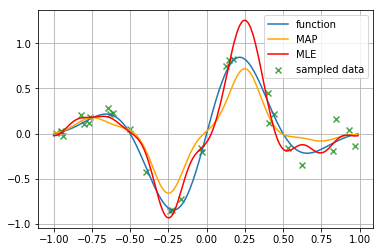

In [6]:
# 荷重減衰パラメータ
l = 1.0
# 計画行列
Phi = gaussian_basic_func(x)
# 重みの計算
w_map = np.linalg.inv(l*np.eye(M) + Phi.T@Phi)@Phi.T@t

# グラフ表示
_x = np.arange(-1, 1, 0.01)
Phi = gaussian_basic_func(_x)
y_map = w_map @ gaussian_basic_func(_x).T

plt.scatter(x, t, marker='x', label='sampled data', alpha='0.7', color='green')

plt.plot(_x, f(_x), label='function')
plt.plot(_x, y_map, label="MAP", color='orange')
plt.plot(_x, y_ml, label="MLE", color='red')

plt.grid()
plt.legend()
plt.show()